# Airline Line Ticket Price Prediction Model Using Kaggle Dataset





Importing necessary library and dataset

In [677]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

Importing the required dataset

The dataset that we are working on is a static dataset of airline companies

In [678]:
data_train=pd.read_excel('/content/Data_Train.xlsx')

In [679]:
data_train.shape

(10683, 11)

In [680]:
data_train.loc[2029]

Airline                     IndiGo
Date_of_Journey         15/06/2019
Source                       Delhi
Destination                 Cochin
Route              DEL → HYD → COK
Dep_Time                     05:05
Arrival_Time                 16:10
Duration                    11h 5m
Total_Stops                 1 stop
Additional_Info            No info
Price                         6818
Name: 2029, dtype: object

In [681]:
#from dataprep.eda import create_report
#import pandas as pd
#dataframe = pd.read_excel("/content/Data_Train.xlsx")
#create_report(dataframe)

## data preparation and exploration,

Clean, Prepare & Manipulate Data

Real-world data often has unorganized, missing, or noisy elements. Therefore, for Machine Learning success, after we chose our data, we need to clean, prepare, and manipulate the data.

This process is a critical step, and people typically spend up to 80% of their time in this stage. Having a clean data set helps with your model’s accuracy down the road.

In [682]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


As we can see the dataset has different data type

Missing values can be handled by deleting the rows or columns having null values. If columns have more than half of rows as null then the entire column can be dropped. The rows which are having one or more columns values as null can also be dropped.

In [683]:
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

As less missing values,I can directly drop these table 

In [684]:
data_train.dropna(inplace=True)

In [685]:
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

We can see from the dataframe that the date_of_journey feature is object data type.We need to convert into time-stamp format because we need to  use this column properly for prediction,and also our machine learning 
 model will not be able to understand these string values,it can only understand Time-stamp.

For this we require pandas to_datetime to convert object data type to datetime dtype.

In [686]:
def to_datetime_type(col):
  data_train[col]=pd.to_datetime(data_train[col])

In [687]:
data_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [688]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
   to_datetime_type(i)

In [689]:
data_train.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [690]:
data_train['day']=data_train['Date_of_Journey'].dt.day

In [691]:
data_train['month']=data_train['Date_of_Journey'].dt.month

In [692]:
data_train['year']=data_train['Date_of_Journey'].dt.year

In [693]:
data_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-08-05 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-08-05 05:50:00,2021-08-05 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-08-05 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-08-05 18:05:00,2021-08-05 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-08-05 16:50:00,2021-08-05 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2021-08-05 19:55:00,2021-08-05 22:25:00,2h 30m,non-stop,No info,4107,4,9,2019
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2021-08-05 20:45:00,2021-08-05 23:20:00,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2021-08-05 08:20:00,2021-08-05 11:20:00,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2021-08-05 11:30:00,2021-08-05 14:10:00,2h 40m,non-stop,No info,12648,3,1,2019


In [694]:
data_train['year'].unique()

array([2019])

In [695]:
data_train['month'].unique()

array([ 3,  1,  9, 12,  6,  5,  4])

In [696]:
data_train['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [697]:
data_train['Additional_Info'].replace({"No info":'No Info'}, inplace = True)

In [698]:
data_train['month'].value_counts()

6     2535
3     2211
5     2074
9     1406
1     1075
12     957
4      424
Name: month, dtype: int64

Since we have converted Date_of_Journey column into integers, we can drop the column as it is of no use.

In [699]:
data_train.drop('Date_of_Journey',axis=1, inplace=True)

Droping the year column as it is same all over the data.

In [700]:
data_train.drop('year',axis=1, inplace=True)

In [701]:
data_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-08-05 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No Info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-08-05 05:50:00,2021-08-05 13:15:00,7h 25m,2 stops,No Info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-08-05 09:25:00,2021-06-10 04:25:00,19h,2 stops,No Info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-08-05 18:05:00,2021-08-05 23:30:00,5h 25m,1 stop,No Info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-08-05 16:50:00,2021-08-05 21:35:00,4h 45m,1 stop,No Info,13302,3,1


Extracting values from Dep_Time and Arrival_Time as it is also similar to date of journey

We will create a function to seperate the features from the date fields.

In [702]:
def hours_extract(df,column):
  df[column+"_hour"]=df[column].dt.hour

In [703]:
def minutes_extract(df,column):
  df[column+"_minute"]=df[column].dt.minute

In [704]:
hours_extract(data_train,'Dep_Time')
hours_extract(data_train,'Arrival_Time')

In [705]:
minutes_extract(data_train,'Dep_Time')
minutes_extract(data_train,'Arrival_Time')

In [706]:
data_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-08-05 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No Info,3897,24,3,22,1,20,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-08-05 05:50:00,2021-08-05 13:15:00,7h 25m,2 stops,No Info,7662,5,1,5,13,50,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-08-05 09:25:00,2021-06-10 04:25:00,19h,2 stops,No Info,13882,6,9,9,4,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-08-05 18:05:00,2021-08-05 23:30:00,5h 25m,1 stop,No Info,6218,5,12,18,23,5,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-08-05 16:50:00,2021-08-05 21:35:00,4h 45m,1 stop,No Info,13302,3,1,16,21,50,35


Now that we have filtered the necessary components of the label we can now drop the unnessary labels

In [707]:
data_train.drop('Dep_Time',axis=1,inplace=True)
data_train.drop('Arrival_Time',axis=1,inplace=True)

In [708]:
data_train.head()


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No Info,3897,24,3,22,1,20,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No Info,7662,5,1,5,13,50,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No Info,13882,6,9,9,4,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No Info,6218,5,12,18,23,5,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No Info,13302,3,1,16,21,50,35


We again need to apply pre-processing in the duration column to seperate the duration hours and minutes

In [709]:
duration=list(data_train['Duration'])

for i in range(len(duration)):
  if len((duration[i]).split(' '))==2:
    pass
  else:
    if 'h' or 'H' in duration[i]:
      duration[i]=duration[i] + ' 0m'
    else:
      duration[i]='0h ' + duration[i]


In [710]:
data_train['Duration']=duration

In [711]:
data_train['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [712]:
def hour(x):
    return x.split(' ')[0][0:-1]


In [713]:
def minute(y):
    return y.split(' ')[1][0:-1]

In [714]:
data_train['travel_hours']=data_train['Duration'].apply(hour)

In [715]:
data_train['travel_minutes']=data_train['Duration'].apply(minute)

In [716]:
data_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute,travel_hours,travel_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No Info,3897,24,3,22,1,20,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No Info,7662,5,1,5,13,50,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No Info,13882,6,9,9,4,25,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No Info,6218,5,12,18,23,5,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No Info,13302,3,1,16,21,50,35,4,45


In [717]:
data_train.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Duration               object
Total_Stops            object
Additional_Info        object
Price                   int64
day                     int64
month                   int64
Dep_Time_hour           int64
Arrival_Time_hour       int64
Dep_Time_minute         int64
Arrival_Time_minute     int64
travel_hours           object
travel_minutes         object
dtype: object

Need to convert the travel hours and minutes column to integer data type

In [718]:
data_train['travel_hours']=data_train['travel_hours'].astype(int)
data_train['travel_minutes']=data_train['travel_minutes'].astype(int)

In [719]:
data_train.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Duration               object
Total_Stops            object
Additional_Info        object
Price                   int64
day                     int64
month                   int64
Dep_Time_hour           int64
Arrival_Time_hour       int64
Dep_Time_minute         int64
Arrival_Time_minute     int64
travel_hours            int64
travel_minutes          int64
dtype: object

###Handling categorical data

We are using 2 main Encoding Techniques to convert Categorical data into some numerical format.

1.   Label Encoding for Ordinal Data
2.   OneHotEncoding for Nominal Data



In [720]:
categorical_columns=[Columns for Columns in data_train.columns if data_train[Columns].dtype=='O']

In [721]:
categorical_columns

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [722]:
categorical_data=data_train[categorical_columns]

In [723]:
categorical_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No Info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No Info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No Info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No Info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No Info


In [724]:
categorical_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

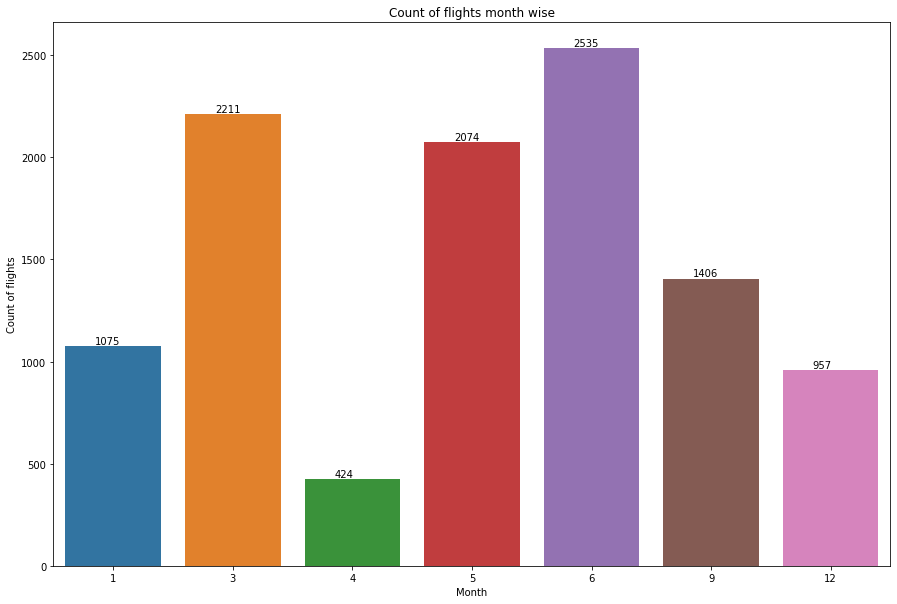

In [725]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'month', data = data_train)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [726]:
monthly_avg=data_train.groupby(['month']).agg({'Price':np.mean}).reset_index()

Analysis :
We see that the total count of flight is maximum towards the month-May which can also be concluded from the above bar plot which shows that the sum of fare is maximum in May.
This can be due to : Summer vacations in the month of may for schools/colleges, hence most families are also generally going for vacations around this time.
The count of flights is lowest on the month of April, this can be because : Schools,colleges have their final exams around this time, offices are mostly busy in the month of April as it is the end of Quarter 1.

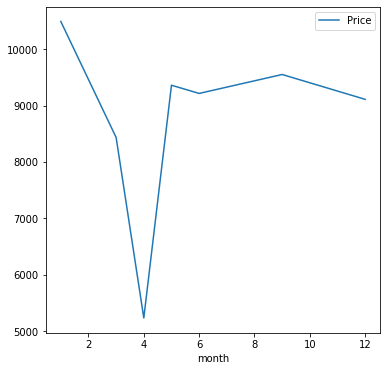

In [727]:
monthly_avg.plot(x='month',y='Price',figsize=(6,6))

We see that the average fare price is highest the month of March , this can be because people usually book the fights 2-3 months prior to their date of journey which leads to higher demand and hence higher fare prices.(since the count of tickets booked for travelling in May is the most, prior bookings are done in March)

#Destination vs Price

<function matplotlib.pyplot.show>

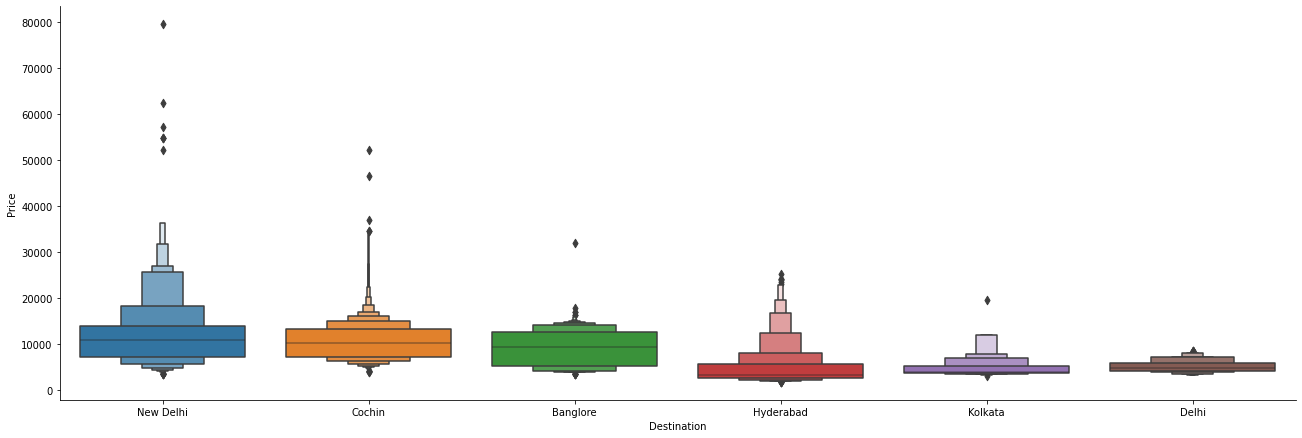

In [728]:
sns.catplot(y='Price',x='Destination',data= data_train.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

The airfare price range in Delhi & New Delhi is the maximum, this can be due to: Jet fuel prices in Delhi had increased in the year of 2018 by 26.4%, it is also the National Capital, political seat of power and a highly visited place for vacations(same for bangalore & cochin)
The same reasoning can be given for higher price range in delhi as the source of the flight

#Source vs Price

<function matplotlib.pyplot.show>

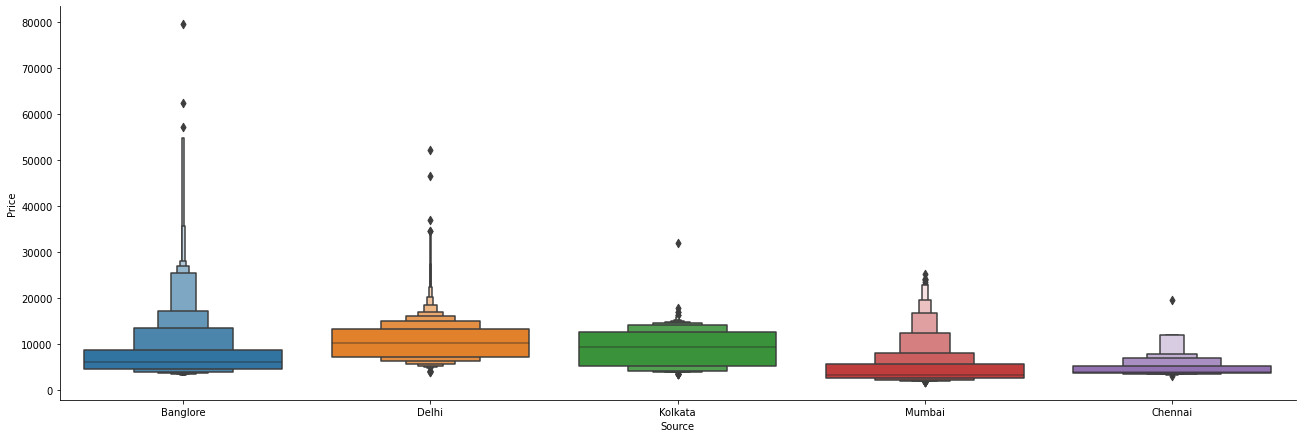

In [729]:
sns.catplot(y='Price',x='Source',data= data_train.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

##Airline vs Price Analysis


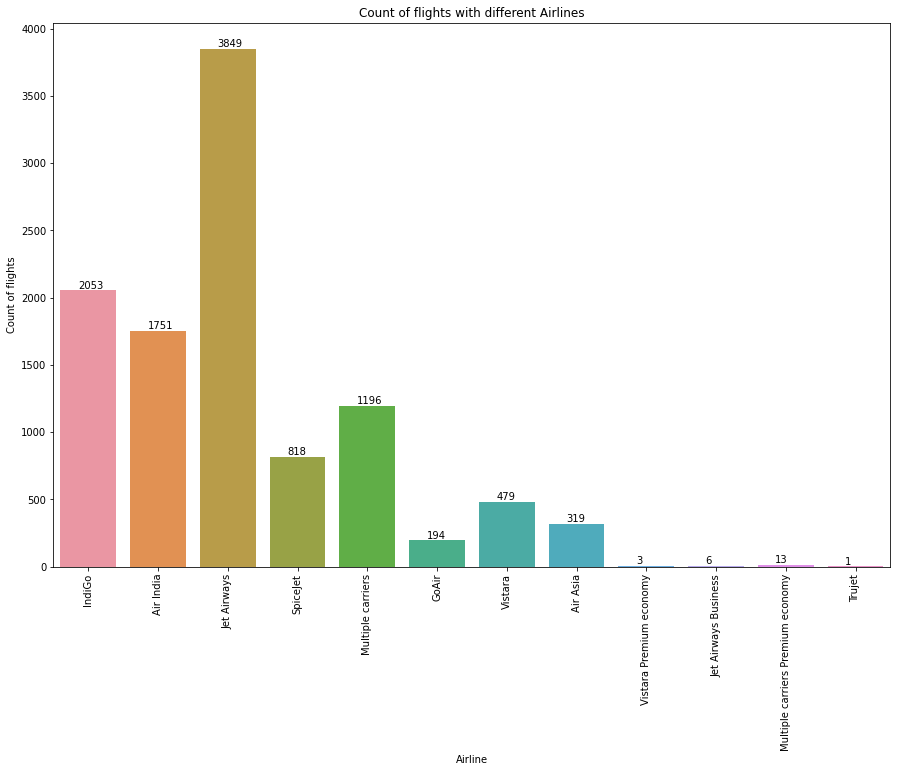

In [730]:
#Count of flights v/s Airline
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =data_train)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

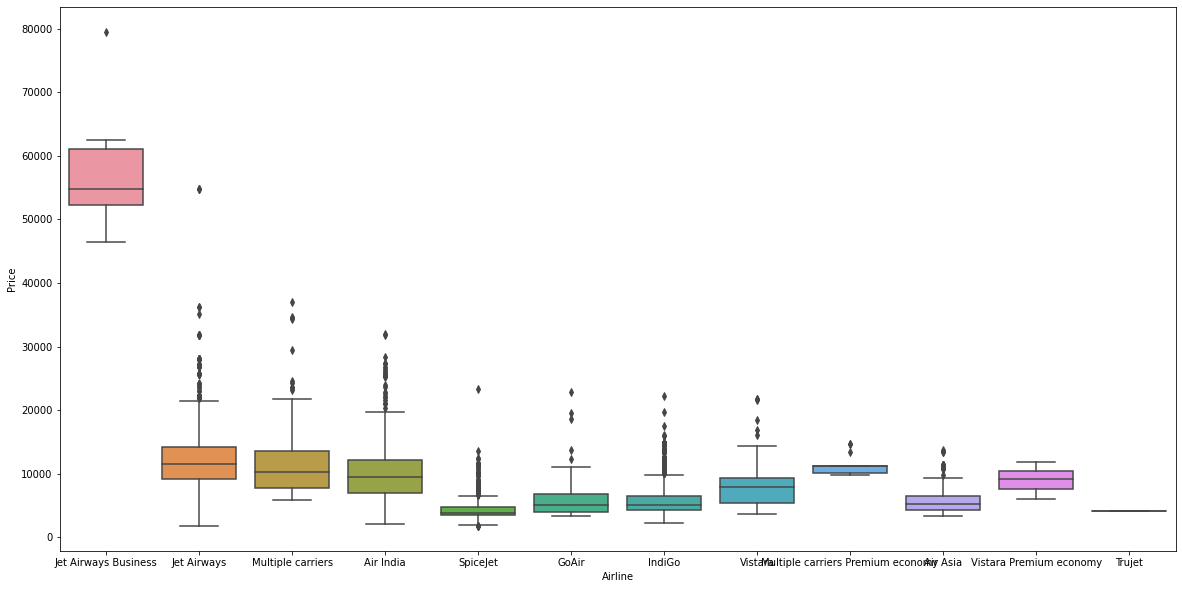

In [731]:
plt.figure(figsize=(20,10))
sns.boxplot(y='Price',x='Airline',data=data_train.sort_values('Price',ascending=False))

Jet airways and Air India are full service airlines are and always highly priced due to various amenities they provide. Low-cost carriers like indigo and spicejet have a lower and similar fare range 

Conclusion--> From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median

Perform Total_Stops vs Price Analysis

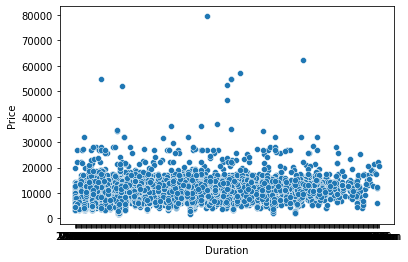

In [732]:
#duration v/s AveragePrice
sns.scatterplot(data=data_train, x='Duration', y='Price')

We know that duration( or distance) plays a major role in affecting air ticket prices but we see no such pattern here, as there must be there are other significant factors affecting air fare like type of airline, destination of flight, date of journey of flight(higher if collides with a public holiday)

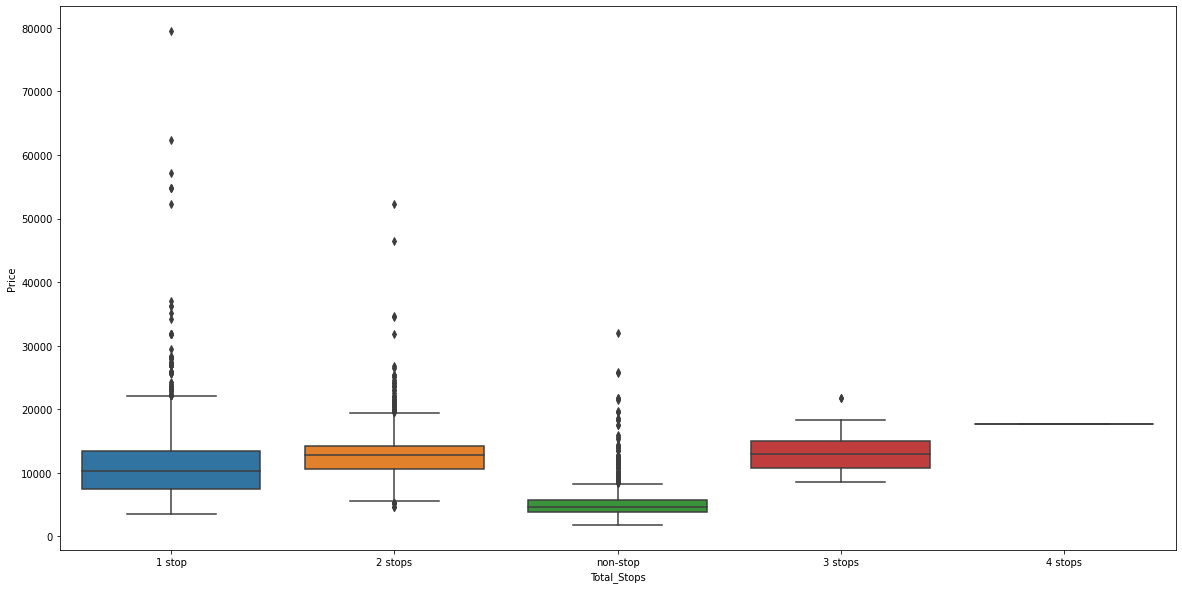

In [733]:
plt.figure(figsize=(20,10))
sns.boxplot(y='Price',x='Total_Stops',data=data_train.sort_values('Price',ascending=False))

get_dummies

In [734]:
airline=pd.get_dummies(categorical_data['Airline'],drop_first=True)
airline.head()


,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [735]:
categorical_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

##Source vs Price

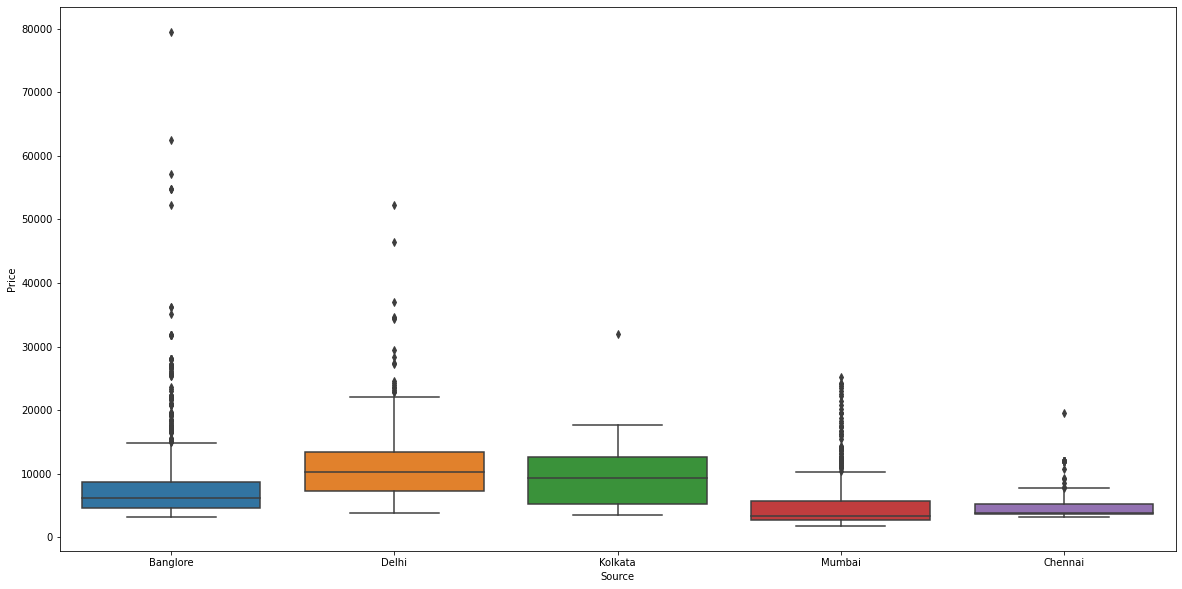

In [736]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Source',y='Price',data=data_train.sort_values('Price',ascending=False))

[Text(0, 0, 'non-stop'),
 Text(0, 0, '2 stops'),
 Text(0, 0, '1 stop'),
 Text(0, 0, '3 stops'),
 Text(0, 0, '4 stops')]

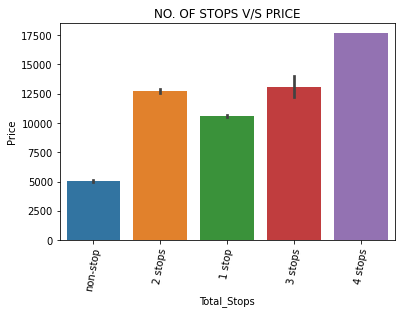

In [737]:
TS=sns.barplot(x='Total_Stops', y='Price', data=data_train)
TS.set_title('NO. OF STOPS V/S PRICE')
TS.set_ylabel('Price')
TS.set_xlabel('Total_Stops')
TS.set_xticklabels(v4.get_xticklabels(), rotation=80)

As a direct/non-stop flight is accounting for fare of only one flight for a trip, its average fair is the least. As the no. of stops/layovers increase, the fare price goes up accounting for no. of flights and due to other resources being used up for the same.

In [738]:
source=pd.get_dummies(categorical_data['Source'],drop_first=True)
source.head()


,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [739]:
categorical_data['Destination'].value_counts()


Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

Destination is also a nominal data

In [740]:
destination=pd.get_dummies(categorical_data['Destination'],drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [741]:
categorical_data['Route'].unique().tolist()

['BLR → DEL',
 'CCU → IXR → BBI → BLR',
 'DEL → LKO → BOM → COK',
 'CCU → NAG → BLR',
 'BLR → NAG → DEL',
 'CCU → BLR',
 'BLR → BOM → DEL',
 'DEL → BOM → COK',
 'DEL → BLR → COK',
 'MAA → CCU',
 'CCU → BOM → BLR',
 'DEL → AMD → BOM → COK',
 'DEL → PNQ → COK',
 'DEL → CCU → BOM → COK',
 'BLR → COK → DEL',
 'DEL → IDR → BOM → COK',
 'DEL → LKO → COK',
 'CCU → GAU → DEL → BLR',
 'DEL → NAG → BOM → COK',
 'CCU → MAA → BLR',
 'DEL → HYD → COK',
 'CCU → HYD → BLR',
 'DEL → COK',
 'CCU → DEL → BLR',
 'BLR → BOM → AMD → DEL',
 'BOM → DEL → HYD',
 'DEL → MAA → COK',
 'BOM → HYD',
 'DEL → BHO → BOM → COK',
 'DEL → JAI → BOM → COK',
 'DEL → ATQ → BOM → COK',
 'DEL → JDH → BOM → COK',
 'CCU → BBI → BOM → BLR',
 'BLR → MAA → DEL',
 'DEL → GOI → BOM → COK',
 'DEL → BDQ → BOM → COK',
 'CCU → JAI → BOM → BLR',
 'CCU → BBI → BLR',
 'BLR → HYD → DEL',
 'DEL → TRV → COK',
 'CCU → IXR → DEL → BLR',
 'DEL → IXU → BOM → COK',
 'CCU → IXB → BLR',
 'BLR → BOM → JDH → DEL',
 'DEL → UDR → BOM → COK',
 'DEL → HY

We now know that there are 128 unique routes

In [742]:
categorical_data['Route1']=categorical_data['Route'].str.split('→').str[0]

In [743]:
categorical_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Route1
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No Info,BLR
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No Info,CCU
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No Info,DEL
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No Info,CCU
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No Info,BLR
...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No Info,CCU
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No Info,CCU
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No Info,BLR
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No Info,BLR


In [744]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [745]:
categorical_data['Route2']=categorical_data['Route'].str.split('→').str[1]
categorical_data['Route3']=categorical_data['Route'].str.split('→').str[2]
categorical_data['Route4']=categorical_data['Route'].str.split('→').str[3]
categorical_data['Route5']=categorical_data['Route'].str.split('→').str[4]

In [746]:
categorical_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No Info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No Info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No Info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No Info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No Info,BLR,NAG,DEL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No Info,CCU,BLR,NaN,NaN,NaN
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No Info,CCU,BLR,NaN,NaN,NaN
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No Info,BLR,DEL,NaN,NaN,NaN
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No Info,BLR,DEL,NaN,NaN,NaN


In [747]:
categorical_data['Route1'].fillna('None',inplace=True)
categorical_data['Route2'].fillna('None',inplace=True)
categorical_data['Route3'].fillna('None',inplace=True)
categorical_data['Route4'].fillna('None',inplace=True)
categorical_data['Route5'].fillna('None',inplace=True)

Now lets find out how many values are there in each category

In [748]:
for values in categorical_data.columns:
  print(values,len(categorical_data[values].value_counts()))

Airline 12
Source 5
Destination 6
Route 128
Duration 368
Total_Stops 5
Additional_Info 9
Route1 5
Route2 45
Route3 30
Route4 14
Route5 6


As there are lot of values in the route feature we have to apply label encoding.

In [749]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()

In [750]:
for i in ['Route1','Route2','Route3','Route4','Route5']:
  categorical_data[i]=en.fit_transform(categorical_data[i])

In [751]:
categorical_data.dtypes

Airline            object
Source             object
Destination        object
Route              object
Duration           object
Total_Stops        object
Additional_Info    object
Route1              int64
Route2              int64
Route3              int64
Route4              int64
Route5              int64
dtype: object

In [752]:
categorical_data.drop('Route',axis=1,inplace=True)


In [753]:
Add_info = categorical_data['Additional_Info']
Add_info = pd.get_dummies(Add_info, drop_first = True)

In [754]:
Add_info

,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,Red-eye flight
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,1,0,0
10679,0,0,0,0,0,1,0,0
10680,0,0,0,0,0,1,0,0
10681,0,0,0,0,0,1,0,0


In [755]:
categorical_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

This seems to be ordinal category hence we can perform label encoding

In [756]:
dict={'non-stop':0,'2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}


In [757]:
categorical_data['Total_Stops']=categorical_data['Total_Stops'].map(dict)

In [758]:
continous_columns=[Columns for Columns in data_train.columns if data_train[Columns].dtype!='O']

In [759]:
continous_columns

['Price',
 'day',
 'month',
 'Dep_Time_hour',
 'Arrival_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_minute',
 'travel_hours',
 'travel_minutes']

In [760]:
data_train[continous_columns].head()

,Price,day,month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute,travel_hours,travel_minutes
0,3897,24,3,22,1,20,10,2,50
1,7662,5,1,5,13,50,15,7,25
2,13882,6,9,9,4,25,25,19,0
3,6218,5,12,18,23,5,30,5,25
4,13302,3,1,16,21,50,35,4,45


 #Concatenate dataframe --> categorical + Airline + Source + Destination#

In [761]:
FE_data_train=pd.concat([categorical_data,airline,source,destination,Add_info,data_train[continous_columns]],axis=1)

In [762]:
FE_data_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,Red-eye flight,Price,day,month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute,travel_hours,travel_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0,No Info,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3897,24,3,22,1,20,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,No Info,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7662,5,1,5,13,50,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2,No Info,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,13882,6,9,9,4,25,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,No Info,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6218,5,12,18,23,5,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,No Info,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,13302,3,1,16,21,50,35,4,45


In [763]:
FE_data_train.drop('Duration',axis=1,inplace=True)
FE_data_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,Red-eye flight,Price,day,month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute,travel_hours,travel_minutes
0,IndiGo,Banglore,New Delhi,0,No Info,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3897,24,3,22,1,20,10,2,50
1,Air India,Kolkata,Banglore,2,No Info,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7662,5,1,5,13,50,15,7,25
2,Jet Airways,Delhi,Cochin,2,No Info,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,13882,6,9,9,4,25,25,19,0
3,IndiGo,Kolkata,Banglore,1,No Info,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6218,5,12,18,23,5,30,5,25
4,IndiGo,Banglore,New Delhi,1,No Info,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,13302,3,1,16,21,50,35,4,45


In [764]:
FE_data_train.shape

(10682, 47)

In [765]:
FE_data_train.columns.value_counts()

Kolkata                              2
Delhi                                2
Cochin                               1
Route5                               1
Change airports                      1
Air India                            1
Price                                1
Route3                               1
Red-eye flight                       1
Additional_Info                      1
Vistara                              1
IndiGo                               1
2 Long layover                       1
Route4                               1
In-flight meal not included          1
day                                  1
Business class                       1
travel_minutes                       1
No Info                              1
New Delhi                            1
Total_Stops                          1
Route1                               1
Multiple carriers Premium economy    1
Jet Airways                          1
Hyderabad                            1
Chennai                  

In [766]:
FE_data_train.drop('Destination',axis=1,inplace=True)
FE_data_train.drop('Source',axis=1,inplace=True)
FE_data_train.drop('Airline',axis=1,inplace=True)
FE_data_train.drop('Additional_Info',axis=1,inplace=True)

#Outlier Detection

In [767]:
def distribution_plot(df,column):
  fig,(axis1,axis2)=plt.subplots(2,1)
  sns.distplot(df[column],ax=axis1)
  sns.boxplot(df[column],ax=axis2)

<Figure size 3600x3600 with 0 Axes>

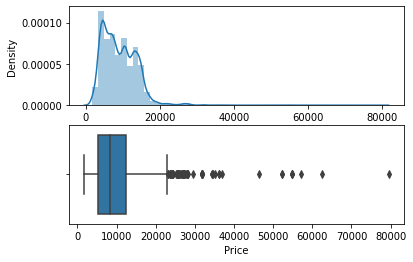

In [768]:
plt.figure(figsize=(50,50))
distribution_plot(FE_data_train,'Price')

Dealing with outliers

As we can see there are so many outliers with respect to the price

In [769]:
FE_data_train['Price']=np.where(FE_data_train['Price']>=40000,FE_data_train['Price'].median(),FE_data_train['Price'])

<Figure size 3600x3600 with 0 Axes>

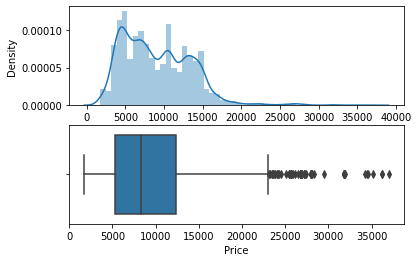

In [770]:
plt.figure(figsize=(50,50))
distribution_plot(FE_data_train,'Price')

Now lets seperate our independent and dependent data

In [771]:
X=FE_data_train.drop('Price',axis=1)
X

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,Red-eye flight,day,month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute,travel_hours,travel_minutes
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,24,3,22,1,20,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,5,13,50,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,6,9,9,4,25,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,12,18,23,5,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,1,16,21,50,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2,5,29,13,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,9,19,22,55,25,2,30
10679,0,2,5,29,13,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,27,4,20,23,45,20,2,35
10680,0,0,13,29,13,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,27,4,8,11,20,20,3,0
10681,0,0,13,29,13,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,1,11,14,30,10,2,40


In [772]:
X.shape

(10682, 42)

In [773]:
X.isnull().sum()

Total_Stops                          0
Route1                               0
Route2                               0
Route3                               0
Route4                               0
Route5                               0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Chennai                              0
Delhi                                0
Kolkata                              0
Mumbai                               0
Cochin                               0
Delhi                                0
Hyderabad                            0
Kolkata                              0
New Delhi                

In [774]:
y=FE_data_train['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [775]:
y.isnull().sum()

0

In [776]:
from sklearn.feature_selection import mutual_info_classif

#Feature Selection




Now we need to find the best features that will contribute to find a perfect relation with target variable

We do this also to reduce the curese of dimentionality to get rid of duplicate features

####  Feature Selection using Information Gain,

In [777]:
FSC=mutual_info_classif(X,y)

In [778]:
FS=pd.DataFrame(FSC,index=X.columns)

In [779]:
FS

,0
Total_Stops,2.162678
Route1,1.982254
Route2,2.771712
Route3,2.303129
Route4,1.435965
Route5,0.702744
Air India,0.745254
GoAir,0.089122
IndiGo,0.683602
Jet Airways,0.927780


In [780]:
FS.columns=['Significance']
FS.sort_values(by='Significance',ascending=False,inplace=True)

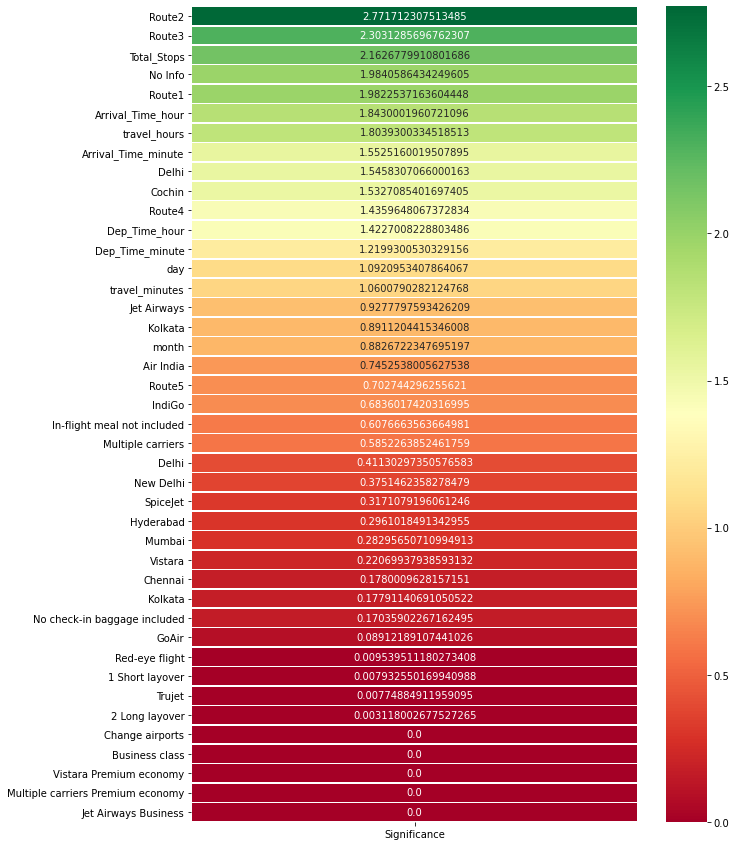

In [781]:
fig ,f=plt.subplots(figsize=(10,15))
sns.heatmap(FS,annot=True,fmt="",cmap='RdYlGn',linewidths=0.60,ax=f)
plt.show()

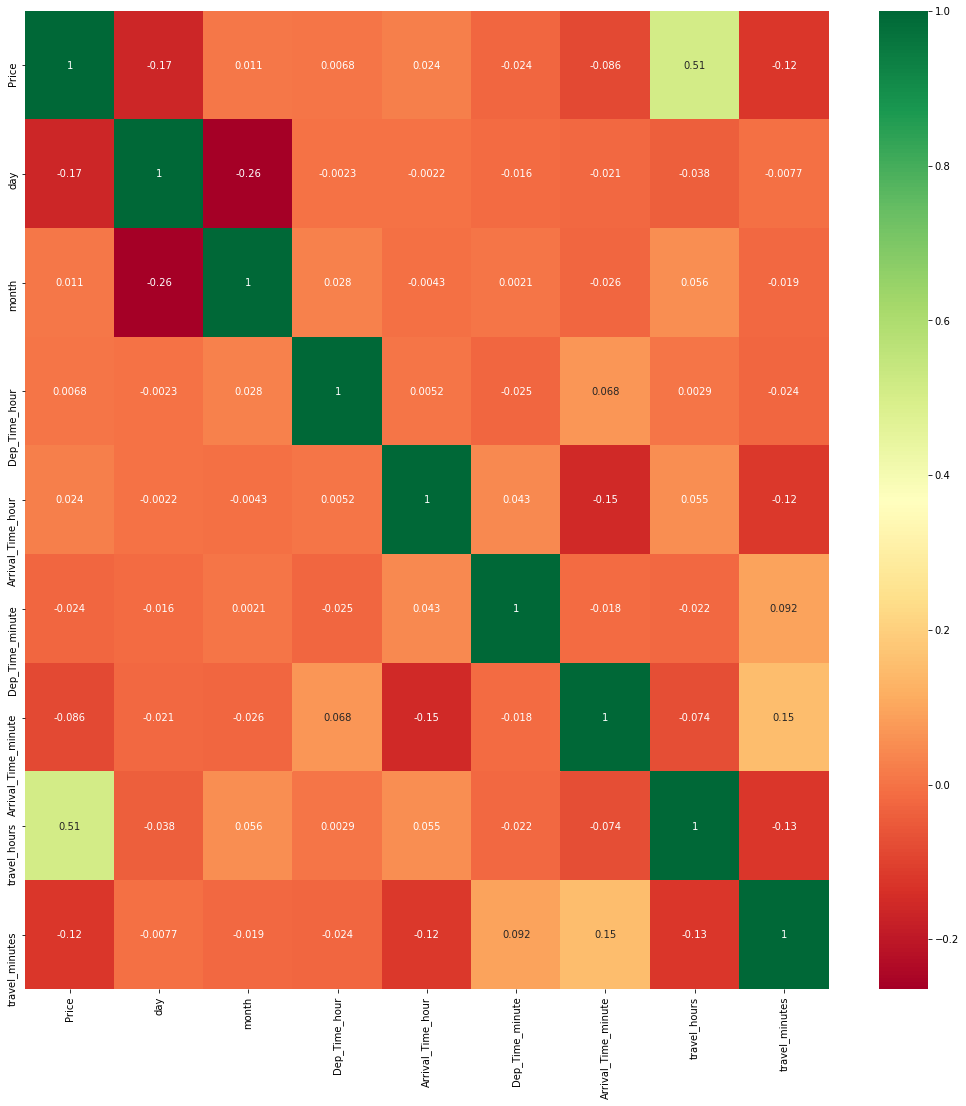

In [782]:
# Finding correlation betwwen Independent and Dependent Feature

plt.figure(figsize=(18,18))
sns.heatmap(data_train.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [783]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=34)

In [784]:
X_train.shape

(8545, 42)

In [785]:
X_test.shape

(2137, 42)

In [786]:
X_test.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,Red-eye flight,day,month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute,travel_hours,travel_minutes
2029,1,3,20,6,13,5,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,15,6,5,16,5,10,11,5
1603,1,2,15,3,13,5,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5,1,10,17,20,35,7,15
8773,1,3,7,6,13,5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,27,6,9,19,0,15,10,15
3541,0,1,19,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,18,6,2,4,35,5,1,30
2079,1,0,0,8,13,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,1,0,20,30,30,20,0


In [787]:
X_train.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,Red-eye flight,day,month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute,travel_hours,travel_minutes
5170,1,2,37,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6,9,21,2,0,15,5,15
7427,1,3,32,6,13,5,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,3,9,5,10,35,10,4,35
4258,1,0,7,8,13,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,6,22,5,50,5,6,15
10514,1,3,7,6,13,5,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,6,12,17,1,10,30,8,20
2095,1,0,7,8,13,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,21,3,8,7,55,40,22,45


In [788]:
import pickle

In [789]:
def prediction(best_model,dump):
  model=best_model.fit(X_train,y_train)
  print('Training score is : {}'.format(model.score(X_train,y_train)))
  print('\n')
  y_predict=model.predict(X_test)
  print('The predicted values are : {}'.format(y_predict))
  print('\n')
  r2_score=metrics.r2_score(y_test,y_predict)
  print('coefficient of determination : {}'.format(r2_score))
  MAE=metrics.mean_absolute_error(y_test,y_predict)
  print('Mean absolute error : {}'.format(MAE))
  MSE=metrics.mean_squared_error(y_test,y_predict)
  print('Mean squared error : {}'.format(MSE))
  RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_predict))
  print('root mean square error : {}'.format(RMSE))
  

  print('\n')
  number_of_observations=50
  x_ax = range(len(y_test[:number_of_observations]))
  plt.plot(x_ax, y_test[:number_of_observations], label="original")
  plt.plot(x_ax, y_predict[:number_of_observations], label="predicted")
  plt.title("Flight Price test and predicted data")
  plt.xlabel('Observation Number')
  plt.ylabel('Price')
  plt.legend()
  plt.show()

  if dump==1:
    file=open('C:/Users/benes/Desktop/final year project/model.pkl','wb')
    pickle.dump(model,file)



In [790]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

Training score is : 0.984977456642178


The predicted values are : [ 6675.48        9452.46       13175.59733333 ... 10851.69
  5257.14       14941.58      ]


coefficient of determination : 0.9190576391727509
Mean absolute error : 633.0989655447112
Mean squared error : 1534540.8991952648
root mean square error : 1238.7658774745391




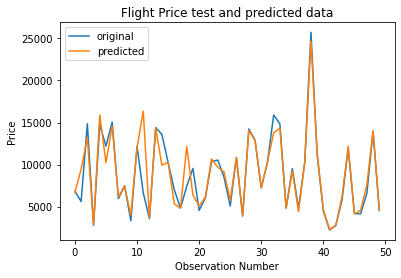

In [791]:
prediction(RandomForestRegressor(),0)


Training score is : 0.6878650905534907


The predicted values are : [ 7126.53864044 10212.42956962 10233.70417148 ... 10170.40105947
 10631.13719566 15257.54303628]


coefficient of determination : 0.6919877972725844
Mean absolute error : 1704.2141280076878
Mean squared error : 5839430.895093474
root mean square error : 2416.4914432071705




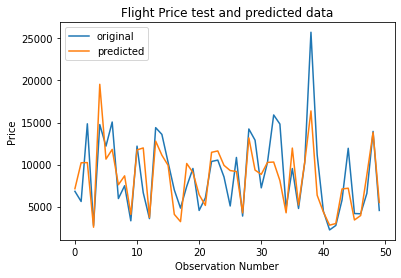

In [792]:
prediction(LinearRegression(),0)


Training score is : 0.4104154476301931


The predicted values are : [ 9646. 11467. 12537. ...  8784. 10262. 13014.]


coefficient of determination : 0.5575742769766876
Mean absolute error : 1650.1605053813757
Mean squared error : 8387701.568086102
root mean square error : 2896.152891006637




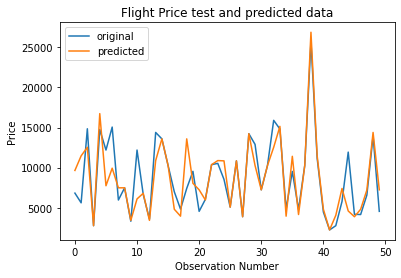

In [793]:
prediction(LogisticRegression(),0)

Training score is : 0.6865810223979882


The predicted values are : [ 7132.68191136 10222.98095595 10226.9206651  ... 10165.76340053
 10639.65318714 15254.82668071]


coefficient of determination : 0.6909465517373643
Mean absolute error : 1704.2683962035796
Mean squared error : 5859171.286201039
root mean square error : 2420.5725120725137




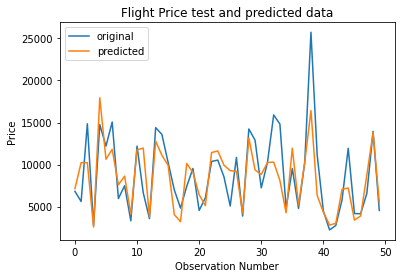

In [794]:
prediction(Lasso(),0)

Training score is : 0.9959526497695492


The predicted values are : [ 6818.  9134.  9526. ... 10678.  5406. 15129.]


coefficient of determination : 0.87108553718819
Mean absolute error : 685.1541881141787
Mean squared error : 2444017.1210809546
root mean square error : 1563.3352554973467




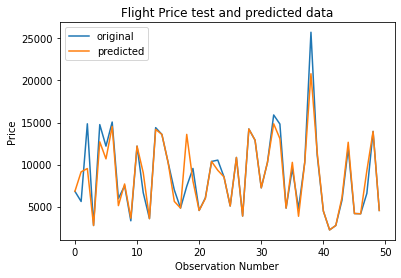

In [795]:
prediction(DecisionTreeRegressor(),0)

Training score is : 0.7878795464553747


The predicted values are : [ 8385.4  8700.8 10343.6 ...  9050.4 11675.4 12490.8]


coefficient of determination : 0.6717906958072446
Mean absolute error : 1649.2394946186241
Mean squared error : 6222336.433392607
root mean square error : 2494.46115090867




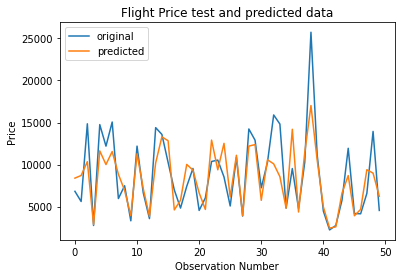

In [796]:
prediction(KNeighborsRegressor(),0)

1.Choose following method for hyperparameter tuning
    a.RandomizedSearchCV --> Fast way to Hypertune model
    b.GridSearchCV--> Slow way to hypertune my model
 
2.Assign hyperparameters in form of dictionary
3.Fit the model
4.Check best paramters and best score

Hyper parameter tuning

In [797]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [798]:
reg_rf=RandomForestRegressor()

In [799]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

# Number of features to consider at every split
max_features=['auto','sqrt']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [800]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [801]:
# Random search of parameters, using 3 fold cross validation

rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [802]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [803]:
rf_random.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_split': 5,
 'n_estimators': 1200}

In [804]:
prediction=rf_random.predict(X_test)

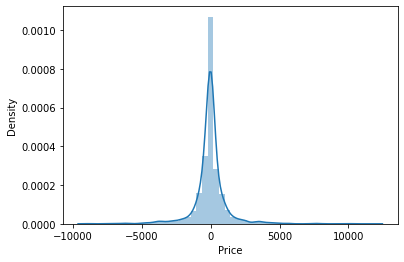

In [805]:
sns.distplot(y_test-prediction)

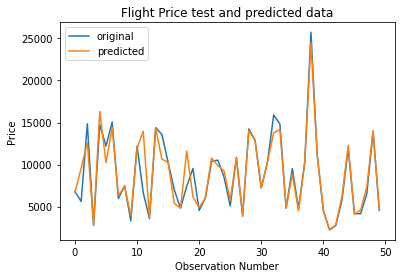

In [806]:
  number_of_observations=50
  x_ax = range(len(y_test[:number_of_observations]))
  plt.plot(x_ax, y_test[:number_of_observations], label="original")
  plt.plot(x_ax, prediction[:number_of_observations], label="predicted")
  plt.title("Flight Price test and predicted data")
  plt.xlabel('Observation Number')
  plt.ylabel('Price')
  plt.legend()
  plt.show()

In [807]:
print('MAE',metrics.mean_absolute_error(y_test,prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 634.0054285390709
MSE 1468802.6967474772
RMSE 1211.9417051770588


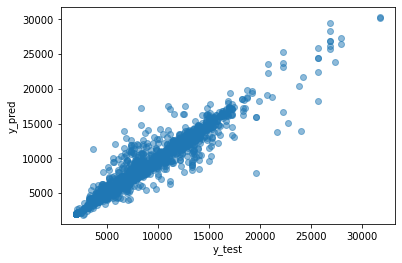

In [808]:
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

Text(0.5, 1.0, 'RF')

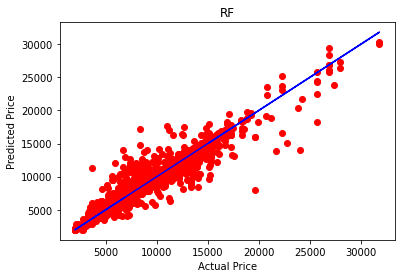

In [809]:
plt.scatter(x=y_test,y=prediction,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('RF')

In [810]:
FE_data_train.head(3)

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,Red-eye flight,Price,day,month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute,travel_hours,travel_minutes
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3897.0,24,3,22,1,20,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7662.0,5,1,5,13,50,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,13882.0,6,9,9,4,25,25,19,0


In [811]:
rf=RandomForestRegressor(n_estimators=200,random_state=0,min_samples_split=10)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [812]:
pred_q = pd.DataFrame()

In [813]:
rf.estimators_

[DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=209652396, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=398764591, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impur

In [814]:
for pred in rf.estimators_:
  temp = pd.Series(pred.predict(X_test).round(2))
  pred_q = pd.concat([pred_q,temp],axis=1)
pred_q.head()

,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,6274.93,6709.71,6667.08,6570.67,6572.00,6669.5,6298.8,6702.67,6580.80,6371.82,6554.80,6665.11,6637.50,6673.56,6513.17,6763.54,6521.00,6760.67,6517.38,6727.08,6309.75,6818.00,6430.46,6671.07,6771.41,6577.11,6779.80,6564.53,6735.43,6677.85,6638.00,6628.40,6513.23,6690.57,6689.54,6627.27,6446.89,6706.00,6442.00,6442.00,...,6630.00,7022.60,6775.75,6504.67,6632.57,6640.88,6442.00,6676.83,6624.00,6823.00,6694.67,6733.33,6442.00,6582.91,6695.93,6751.59,6657.83,6515.6,6759.71,6686.33,6303.56,6442.00,6786.86,6686.46,6814.87,6735.27,6681.80,6455.40,6442.0,6781.00,6630.00,6584.75,6490.83,6740.60,6790.17,6320.67,6658.55,6839.23,6343.33,6567.90
1,9147.85,11100.67,9337.36,9314.00,8586.00,9134.0,10844.0,9097.47,6700.58,10807.69,9534.42,8658.80,9314.00,8690.00,9271.56,13118.31,9134.00,9134.00,9161.84,9134.00,10844.00,8586.00,9806.80,11460.00,9434.50,9663.00,8668.85,9663.00,10433.45,9400.33,13279.70,9314.00,9164.00,9593.20,8646.67,9134.00,8586.00,9663.00,10707.00,10844.00,...,9134.00,10559.00,8586.00,8586.00,10844.00,8731.60,9162.42,8586.00,9663.00,9150.36,8586.00,9134.00,8705.67,9146.86,10844.00,11099.38,10844.00,9164.0,11577.00,8714.93,9401.25,9214.00,10754.25,9134.00,9173.23,9182.09,9440.91,11080.92,9134.0,9134.00,10844.00,9469.11,10844.00,9383.80,11064.00,9101.76,9171.79,9453.60,10844.00,10844.00
2,7473.20,10995.00,14848.00,15448.00,9526.00,6923.0,12236.0,15201.18,14323.00,12699.00,13135.25,11601.62,11920.25,10637.25,11772.11,14922.12,13638.36,14396.50,15000.73,13616.87,14833.00,9260.64,14871.33,13915.67,11778.00,13152.00,7728.00,10339.50,11675.86,11355.08,13062.30,14158.86,10122.58,9906.58,14303.45,14743.00,15189.25,13553.50,15373.00,11987.17,...,8732.50,14611.75,13603.00,11725.44,11310.83,11882.25,11457.50,14097.71,10842.14,10850.31,10273.27,15178.00,12920.55,10512.87,13187.50,12337.60,11349.73,10701.0,11490.50,12174.62,13522.15,8833.50,12178.64,10251.09,11691.23,13264.90,14900.50,13327.50,8667.0,14476.00,14743.00,6269.50,8453.41,11158.00,10233.36,15478.00,9575.11,10004.20,14393.80,14112.50
3,2821.27,3195.00,3020.15,2884.67,2884.67,2927.0,2754.0,2876.85,2803.00,2707.07,2754.00,2952.64,2989.20,2786.38,3048.00,2754.00,2754.00,2792.27,2754.00,3076.00,2754.00,2799.23,2821.27,2936.08,2838.08,2796.00,3095.00,3059.09,2993.54,3074.31,2950.00,2754.00,2810.13,2907.29,2868.07,2786.38,2778.76,2852.00,2754.00,2827.50,...,3102.62,2914.36,2936.08,2963.87,2803.00,3081.93,2754.00,2810.00,2754.00,2901.00,2887.08,2803.00,2754.00,2844.46,2754.00,2754.00,2901.00,2854.9,2807.45,2803.00,2838.08,2937.75,2901.00,2901.00,2871.60,2754.00,2866.11,2860.47,2803.0,2899.18,2868.07,2982.14,3063.27,3010.14,2754.00,2847.94,2928.21,2901.00,2899.18,2922.00
4,12711.29,12651.50,12568.25,12651.50,22124.85,12462.2,12537.5,12568.25,12558.00,12485.00,25506.25,12613.50,20125.09,12537.50,14391.38,35535.00,21374.27,13607.00,12669.00,11424.75,23105.91,12061.40,12537.50,12620.75,12558.00,27615.83,12485.00,12523.00,12574.40,12428.00,13215.33,12669.00,18127.30,23187.82,12312.40,27239.67,12593.00,28907.89,26950.31,12704.00,...,25103.00,20408.00,33152.00,12593.00,12568.25,12371.00,20325.86,12537.50,13157.54,22485.20,36235.00,28393.25,22528.33,27606.00,12558.00,25030.00,12371.00,21607.7,22040.62,12651.50,11934.27,12537.50,21886.38,12662.00,22263.75,21401.27,15120.33,12369.14,12669.0,12651.50,11867.44,11494.23,17552.71,12163.14,22723.08,21446.47,12563.86,12594.50,12593.00,30666.93


In [841]:

quantiles= [0.01,0.05,0.50,0.95,0.99]


In [842]:
RF_actual_pred = pd.DataFrame()

In [843]:
for q in quantiles:
  s= pred_q.quantile(q=q,axis=1)
  RF_actual_pred=pd.concat([RF_actual_pred,s],axis=1,sort=False)



RF_actual_pred.head()


,0.01,0.05,0.50,0.95,0.99
0,6269.4876,6342.9905,6630.00,6818.0000,6893.4907
1,6539.3420,8586.0000,9280.77,11103.2365,12391.3431
2,7264.5500,8663.1000,12733.25,15201.2900,15448.3000
3,2753.6840,2754.0000,2846.20,3095.3810,3240.6636
4,11065.0638,12060.5635,12704.00,28938.8955,35542.0000


In [844]:

RF_actual_pred=pd.DataFrame()

for q in quantiles:
  s= pred_q.quantile(q=q,axis=1)
  RF_actual_pred=pd.concat([RF_actual_pred,s],axis=1,sort=False)
RF_actual_pred = RF_actual_pred.set_index(y_test.index)
RF_actual_pred.columns=quantiles

RF_actual_pred.head()


,0.01,0.05,0.50,0.95,0.99
2029,6269.4876,6342.9905,6630.00,6818.0000,6893.4907
1603,6539.3420,8586.0000,9280.77,11103.2365,12391.3431
8773,7264.5500,8663.1000,12733.25,15201.2900,15448.3000
3541,2753.6840,2754.0000,2846.20,3095.3810,3240.6636
2079,11065.0638,12060.5635,12704.00,28938.8955,35542.0000


In [845]:
RF_actual_pred['actual'] = y_test
RF_actual_pred

,0.01,0.05,0.5,0.95,0.99,actual
2029,6269.4876,6342.9905,6630.000,6818.0000,6893.4907,6818.0
1603,6539.3420,8586.0000,9280.770,11103.2365,12391.3431,5608.0
8773,7264.5500,8663.1000,12733.250,15201.2900,15448.3000,14848.0
3541,2753.6840,2754.0000,2846.200,3095.3810,3240.6636,2754.0
2079,11065.0638,12060.5635,12704.000,28938.8955,35542.0000,14752.0
...,...,...,...,...,...,...
4692,6883.0000,7812.6125,9985.405,13337.6250,13775.9400,7888.0
8419,6375.3175,6551.7625,7141.240,8838.6000,9802.3691,7934.0
2899,8574.6217,9599.8200,10816.495,11916.0915,12064.9353,10678.0
7531,4757.0000,4897.0000,5196.080,5291.5000,5385.3882,5177.0


In [846]:
RF_actual_pred['interval'] = RF_actual_pred[np.max(quantiles)]-RF_actual_pred[np.min(quantiles)]
RF_actual_pred

,0.01,0.05,0.5,0.95,0.99,actual,interval
2029,6269.4876,6342.9905,6630.000,6818.0000,6893.4907,6818.0,624.0031
1603,6539.3420,8586.0000,9280.770,11103.2365,12391.3431,5608.0,5852.0011
8773,7264.5500,8663.1000,12733.250,15201.2900,15448.3000,14848.0,8183.7500
3541,2753.6840,2754.0000,2846.200,3095.3810,3240.6636,2754.0,486.9796
2079,11065.0638,12060.5635,12704.000,28938.8955,35542.0000,14752.0,24476.9362
...,...,...,...,...,...,...,...
4692,6883.0000,7812.6125,9985.405,13337.6250,13775.9400,7888.0,6892.9400
8419,6375.3175,6551.7625,7141.240,8838.6000,9802.3691,7934.0,3427.0516
2899,8574.6217,9599.8200,10816.495,11916.0915,12064.9353,10678.0,3490.3136
7531,4757.0000,4897.0000,5196.080,5291.5000,5385.3882,5177.0,628.3882


In [848]:
RF_actual_pred = RF_actual_pred.sort_values('interval')
RF_actual_pred

,0.01,0.05,0.5,0.95,0.99,actual,interval
7308,10844.0000,10844.000,10844.000,10844.0000,10844.0,10844.0,0.0000
3147,12373.0000,12373.000,12373.000,12373.0000,12373.0,12373.0,0.0000
9011,12898.0000,12898.000,12898.000,12898.0000,12898.0,12898.0,0.0000
7592,7064.0000,7064.000,7064.000,7064.0000,7064.0,7064.0,0.0000
1874,11087.0000,11087.000,11087.000,11087.0000,11087.0,11087.0,0.0000
...,...,...,...,...,...,...,...
7733,4145.0000,4145.000,4278.135,16201.3255,31945.0,4145.0,27800.0000
2866,4145.0000,4145.000,4283.225,16201.3255,31945.0,4435.0,27800.0000
4521,8372.0000,15284.250,26107.290,33744.0775,36235.0,25735.0,27863.0000
8883,6106.0000,6668.366,9980.465,27222.0200,34273.0,6645.0,28167.0000


In [849]:
RF_actual_pred = RF_actual_pred.round(2)
RF_actual_pred

,0.01,0.05,0.5,0.95,0.99,actual,interval
7308,10844.00,10844.00,10844.00,10844.00,10844.0,10844.0,0.00
3147,12373.00,12373.00,12373.00,12373.00,12373.0,12373.0,0.00
9011,12898.00,12898.00,12898.00,12898.00,12898.0,12898.0,0.00
7592,7064.00,7064.00,7064.00,7064.00,7064.0,7064.0,0.00
1874,11087.00,11087.00,11087.00,11087.00,11087.0,11087.0,0.00
...,...,...,...,...,...,...,...
7733,4145.00,4145.00,4278.14,16201.33,31945.0,4145.0,27800.00
2866,4145.00,4145.00,4283.23,16201.33,31945.0,4435.0,27800.00
4521,8372.00,15284.25,26107.29,33744.08,36235.0,25735.0,27863.00
8883,6106.00,6668.37,9980.46,27222.02,34273.0,6645.0,28167.00


In [850]:
r2 = metrics.r2_score(RF_actual_pred['actual'], RF_actual_pred[0.5]).round(2)
print('R2 score is {}'.format(r2))



R2 score is 0.93


In [893]:
def showIntervals(df):
  df=df.reset_index(drop='index')
  plt.figure(figsize=(20,10))
  plt.plot(df['actual'],'go',markersize=3,label='Actual')
  plt.fill_between(np.arange(df.shape[0]),df[0.01],df[0.99],alpha=0.5,color="r",label="Predicted interval")
  plt.xlabel("samples.")
  plt.ylabel("Values and prection intervals")
 
  

  plt.legend()
  plt.show()

In [857]:
def correctpcnt(df):
  correct = 0
  obs = df.shape[0]
  for i in range(obs):
    if df.loc[i,0.01] <= df.loc[i,'actual'] <= df.loc[i,0.99]:
        correct += 1
  print(correct/obs)



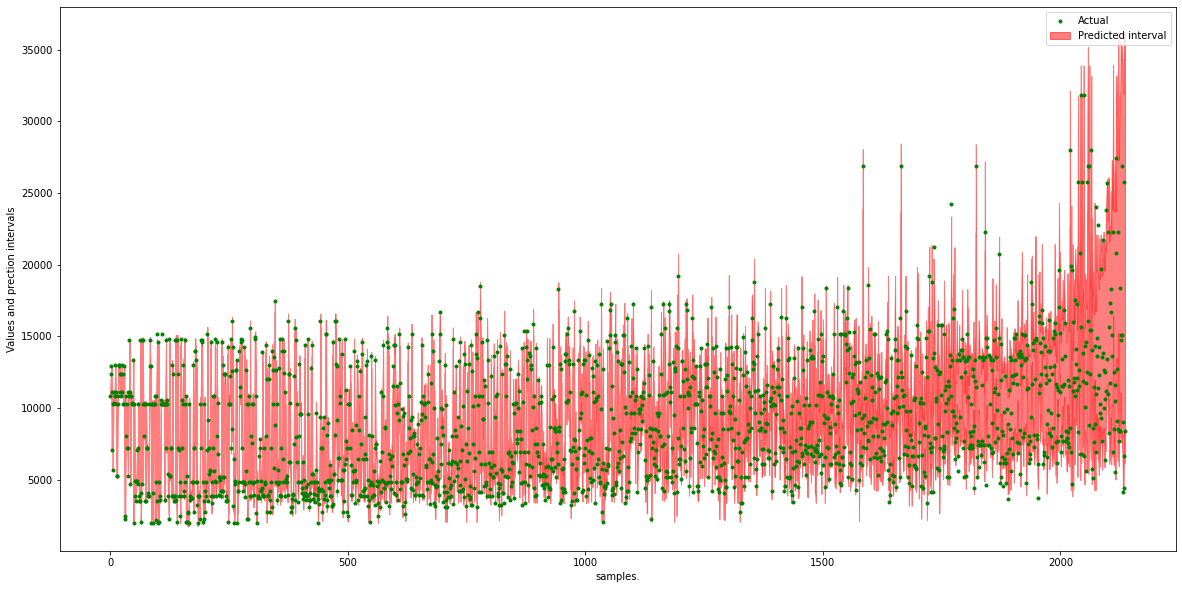

In [894]:
showIntervals(RF_actual_pred)

In [ ]:
!pip install pickle

In [884]:
import pickle

In [885]:
# open a file, where you want to store the data
file=open('rf_random.pkl','wb')

In [886]:
# dump information to that file
pickle.dump(rf_random,file)

In [887]:
model=open('rf_random.pkl','rb')
forest=pickle.load(model)

In [888]:
y_prediction=forest.predict(X_test)

In [889]:
y_prediction

array([ 6652.97473209,  9556.76415972, 12619.1608468 , ...,
       10858.84993422,  5220.81074516, 14833.41864328])

In [890]:
metrics.r2_score(y_test,y_prediction)

0.9225251292249573